# 中學生Python解難 培訓教材

著作: 周艾迪 版權所有


## 一.Python 版本及套件
Python 3.9.6  
提供的套件：Python 內置 Modules，及以下：  
Requests  
Untangle  
BeautifulSoup4  
Selenium  
Numpy   
Pandas  
MatPlotLib  
python-docx  
openpyxl  

## 例一: 圖像檔案分類   
輸入: 多個圖像檔案  
輸出: 多個含有圖片的Word.docx 檔案   
描述: 現有以下圖片檔案, 分類並存放不同的Word.docx檔,  
	.  1001-.a.png  
	.  1001-b.jpeg  
	.  1001-c.jpg  
	.  21444-a.jpg  
	.  21444-b.jpg  
輸出檔:  
	1001.docx   
	21444.docx  


In [2]:
from os import listdir
def out_docx(mypath,filename,jpeglist):
    from docx import Document
    document = Document()
    document.add_heading('Document Title', 0)
    for f in jpeglist:
        pic_path=f"{mypath}{f}"
        document.add_picture(pic_path)
    document.save('./ex1/out/'+filename)

mypath = "./ex1/in/"
files = listdir(mypath)
category={}
for f in files:
    if ".jpg" in f  and '-' in f:
        key , x =f.split('-')
        if key in category:
            category[key].append( f )
        else:
            category[key]=[f]

for k in category:
    filename =f"{k}.docx"
    print(filename)
    print(category[k])
    out_docx(mypath,filename,category[k])

IMG_20210907.docx
['IMG_20210907-204549 (1).jpg', 'IMG_20210907-204549 (2).jpg', 'IMG_20210907-204549 (3).jpg']
IMG_20210908.docx
['IMG_20210908-1.jpg', 'IMG_20210908-2.jpg']


## 例二: 網站截取:
輸入: 新聞網站  
輸出: 一個TXT檔及多個Word.docx  
描述: 現有http://localhost/example-1/news.php 希望能截取最新的內容, 一個txt記錄所有標題。另外每則新聞標題及文字內容則放到一個獨立Word.docx檔案中, 一則新聞一個檔. 新聞標題為檔名.

In [4]:
import datetime
today_date = datetime.date.today()
''' today in YYYY-MM-DD format.'''
print(today_date.isoformat())

2021-09-20


In [ ]:
def out_txtfile(msg):
    with open(f"./ex2/out/news_title.txt", 'a',encoding='utf-8') as the_file:
        the_file.write(str(msg))
        the_file.write('\n')

def out_docx(filename,context):
    from docx import Document
    document = Document()
    document.add_heading(filename, 0)
    document.add_paragraph(context, style='List Bullet'  )
    document.save("./ex2/out/"+filename+".docx")        

In [27]:
#2.2 BeautifulSoup & requests ; soup.select("#all_article_list a")
#<div class="list" id="all_article_list">
#<ul>
#   <li><span class="default"> <a href="content_1483173.htm">我疫苗無現嚴重不良反應</a></span></li> 
#   <li> <span class="default"> <a href="content_1483175.htm">衛健委：打完疫苗仍要戴口罩</a></span></li> 
#</ul>
#</div>
from bs4 import BeautifulSoup
import requests
macodaily_date=today_date.strftime("%Y-%m/%d")
_url=f"http://www.macaodaily.com/html/{macodaily_date}/node_1.htm"
_res = requests.get(_url)
_res.encoding = "utf-8"
soup = BeautifulSoup(_res.text, "html.parser")
links = soup.select("#all_article_list a") #.find_all(["h1","h2","h3","h4","h5"])
for link in links:
    news_title = link.getText()
    if "：體育" in news_title:
        break
    print(news_title)
    #out_txtfile(news_title)
print("finished .")


A01：澳聞
衛健委：重點人群應種盡種
火龍果樣本病毒核檢正常
母乳媽媽：自然斷奶再打針
醫務人員：哺乳母打針保護嬰兒

A02：澳聞
四人攜百六遊戲手掣青茂被截
撞毀路牌不顧而去男子自首
兩男女被盜刷信用卡失萬七
內港地舖插座燒焦六人疏散
內地漢逾居持假證被拘

A03：澳聞
中秋賞月歡度佳節不忘抗疫
兩巴中秋延長服務便民出行
中秋燈飾高掛人月兩圓

A04：澳聞
珠海上光影劇點亮夜經濟
民眾建澳促盡快設全民醫保
光影引客
學校倡參考公務員執行指引
港澳台媒體在京記者迎中秋
“二五規劃”結合“方案”引領社會奮發有為

A05：澳聞
中區扶輪社認識何賢事跡
羅坑同鄉會換屆培育青年
團體賀中秋迎國慶
完善配套打造遺址片區
真善之友關懷唐寶寶
團體頒奬學金
永利鏡湖推危重症救治計劃
蘇嘉豪總結立會工作提四不足
家暴法中關於輔助人的規定

A06：澳聞
本地遊整合十三路線更好玩
藝術家“起筷”饗視覺盛宴
簽發空頭支票須負刑責

A07：澳聞
中總：豐富“一國兩制”成功實踐
經發委：深合區為澳青建平台
街總倡完善深合區養老配套
婦聯冀琴澳長者服務融合發展
新聞特搜

A08：澳聞
理工升旗禮迎新學年
親子溝通經驗分享
濠小學生認識九一八事變
教業嘉許優秀教師頌師恩
專家科大網談分子醫學

A09：澳聞
長隆成功繁育極危尖犁頭鰩
（新聞小語）相信科學 打針抗疫
數居民經屋遭解約遞請願信
今多雲間有陽光

A10：經濟
留家過節 酒店：中秋訂房兩三成
（一家之言）疫情放緩 小型會議試水溫
興趣變事業  開兩店主打裱花蛋糕
青企：跨區開分店擴客源
中銀中小企：建立核心產品
生產力：按客喜好 開發新產品
學者：疫下延長優惠保銷售

A11：經濟
前景未明 濠賭股短期難反彈
五智能科技項目入圍雙創賽
恆大地產爆雷 “不要讓許家印跑了！”
粵港澳大灣區進一步融合
南向通落地利好債券市場
海豐受惠航運費高企

A12：港聞
選委會選舉投票率近九成
林鄭：高投票率顯支持新選制
各界：啟良政善治新篇章
港府將更新疫苗接種記錄

B01：要聞
廈出港國內航班今取消
閩本土確診破三百例
專家：閩疫情發現較晚
孫春蘭：堅決阻斷疫情擴散
嚙齒類動物或是新冠中間宿主

B02：要聞
CIA警告或有兒童為時已晚
澳反封鎖示威數警重傷
日老齡化全球最嚴重
法男走繩索橫跨塞納河
美軍襲阿倖存者促嚴懲兇手


In [ ]:
#<div class="small-8 cell infoContentContainer">
#  <h5 class="captionSize">
#     <a href="https://www.gcs.gov.mo/detail/zh-hant/"><span class="infoSubject">教青局向教育界送上節日祝福</span></a>
#  </h5>
#  <div class="dateNSourceContainer hide-for-small-only grid-x">
#    <div class="sourceLabel shrink cell" title="教育及青年發展局">教育及青年發展局</div>
#  </div>
#  <div class="baseContent baseSize hide-for-small-only fade" style="max-height:4.5rem;">
#     教育暨青年局與高等教育局於今年初合併為教育及青年發展局後，秉持特區政府“優化教育及人
#     才培養工作”、“深化師資隊伍建設”的施政方針，持續革新和優化教師隊伍建設。9
#  </div>
#</div>
from bs4 import BeautifulSoup
import requests
_url=f"https://www.gcs.gov.mo/list/zh-hant/news/%E6%95%99%E8%82%B2%E9%AB%94%E8%82%B2?7"
title_res = requests.get(_url)
title_res.encoding = "utf-8"
soup = BeautifulSoup(title_res.text, "html.parser")
links = soup.select('[class="small-8 cell infoContentContainer"]')
for link in links:
    news_title=link.select("h5.captionSize")[0].getText().replace("'","").replace('"',"").replace("\n","")
    news_context = link.getText()
    out_txtfile(news_title)
    out_docx(news_title,news_context)
print("finished .")

## 例三：訪客統計 
輸入：多個 csv 檔案    
輸出：一個 Excel .xlsx 檔案及一張圖表圖像    
描述：現在有多個 csv 檔案，分別以 YYYY-MM-DD.csv 命名，每個 csv 檔案包括當 天的顧客每小時訪客量。現在生成一個 Excel 報表，第一欄為日期，第二欄 為每日訪客總量，及第三欄為訪客總量三日移動平均值。 另外，希望輸出一個圖表，同時顯示每日訪客總量棒型圖及三日移動平均 線，並設有圖例、標題、軸描述

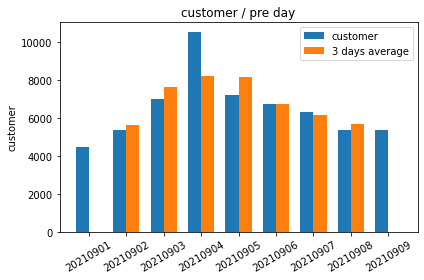

In [28]:
from os import listdir
import pandas as pd
mypath = "./ex3/in/"
files = listdir(mypath)
data_date=[]
data_customer=[]
data_average=[]

for f in files:
    if ".csv" in f  :
        #讀取CSV
        df = pd.read_csv(f'{mypath}{f}', delimiter=',') #, names=('time','customer'))
        data_date.append(f.replace(".csv",""))
        data_customer.append(df["customer"].sum())
        data_average.append(0)
#3日平均數
for idx,val in enumerate(data_customer):
    if idx==0:
        pass
    elif idx==len(data_customer)-1:
        pass
    else:
        data_average[idx]=int((data_customer[idx-1]+val+data_customer[idx+1])/3)

#print([data_date,data_customer,data_average])

#輸出XLSX
d = {'date': data_date, 'total_customer': data_customer,'Ave':data_average }
total_df = pd.DataFrame(data=d)
total_df.to_excel("ex3/out/output.xlsx")  

#棒型圖
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(data_date))  # the label locations
width = 0.35                   # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_customer, width, label='customer')
rects2 = ax.bar(x + width/2, data_average, width, label='3 days average')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('customer')
ax.set_title('customer / pre day')
ax.set_xticks(x)
ax.set_xticklabels(data_date)
ax.legend()
plt.xticks(rotation=30)
fig.tight_layout()
plt.savefig("ex3/out/out.png")

## 例四：Web Automation with Selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import datetime
import ext.config as cfg
options = Options()
browser = webdriver.Chrome('./ext/chromedriver', options=options)
browser.maximize_window()
browser.get(cfg.aa_url)
element = browser.find_element_by_css_selector('#sb-txtSymbol-aa')
element.send_keys(cfg.aa_number)
element.send_keys("\n")  #(Keys.RETURN)
time.sleep(3)
element = browser.find_element_by_css_selector('.lastBox')
print(element.text)
browser.quit()

### 4.1 自簽網站證書 ignore certificate error

In [40]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import datetime
import ext.config as cfg
options = Options()
options.add_argument('ignore-certificate-errors')
browser = webdriver.Chrome('./ext/chromedriver', options=options)
browser.maximize_window()
browser.get(cfg.url1)
time.sleep(3)
browser.quit()

### 例五: pandas dataframe 訪問所有 iterrows

In [ ]:
import re
from os import listdir
import pandas as pd
mypath = "./ext/address.xlsx"
df = pd.read_excel(mypath)

for index , row in df.iterrows():
    road =str(row["ROAD"])
    sroad=str(row["S_ROAD"])
    addr=str(row["ADDRESS"])
    sddr=str(row["S_ADDRESS"])
    naddr = re.findall("\d+", addr)
    naddr="".join(naddr)
    nsddr = re.findall("\d+", sddr)
    nsddr="".join(nsddr)
    if naddr==nsddr:
        print(row["INTERNAL_REF"])
        
    if (naddr in nsddr ) or (nsddr in naddr):
        print(row["INTERNAL_REF"])
        print(addr)
        print(sddr)


## HTML簡介
### 靜態%%html

<html>
<head>
</head>
<body bgcolor="white">
  <H3>Hello</H3>
  <ul>
      <li>1.</li>
      <li>2.</li>
      <li>3.</li>
      <li>4.</li>
  </ul>
      
</body>
</html>

### 程式輸出網頁內容

In [10]:
import tempfile
from os import unlink
from IPython.display import IFrame,HTML

def display_html_to_iframe(html, width=600, height=600):
    name = f"ext/temp.html"
    with open(name, "w") as f:
        print(html, file=f)
    display(IFrame(name, width, height), metadata=dict(isolated=True))
    # unlink(name)
    
def display_html_inline(html):
    display(HTML(html, metadata=dict(isolated=True)))

h="""
<html>
<head>
</head>
<body bgcolor="white">
  <H3>Hello</H3>
  <ul>
      <li>1.</li>
      <li>2.</li>
      <li>3.</li>
      <li>4.</li>
  </ul>
</body>
</html>
"""    
display_html_to_iframe(h)
display_html_inline(h)